In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

  Emp_ID Award_Type  Award_Value  Vesting_Years   Department  Quarter
0   E001        RSU        10000              4  Engineering  Q1_2023
1   E002     Option        15000              3      Finance  Q1_2023
2   E003        RSU        12000              4           HR  Q1_2023
3   E004     Option        18000              5  Engineering  Q2_2023
4   E005        RSU        11000              2      Finance  Q2_2023
        Award_Value  Vesting_Years
count     20.000000       20.00000
mean   13720.000000        3.15000
std     2919.913481        1.03999
min    10000.000000        1.00000
25%    11150.000000        2.75000
50%    13250.000000        3.00000
75%    15625.000000        4.00000
max    19000.000000        5.00000
Award_Type
RSU       12
Option     8
Name: count, dtype: int64


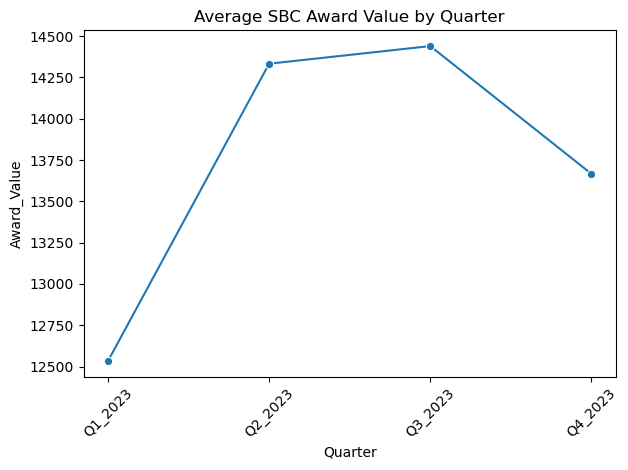

In [2]:
# Load  dataset
df = pd.read_csv("sbc_data.csv")

# Quick look
print(df.head())
print(df.describe())
print(df["Award_Type"].value_counts())



df_grouped = df.groupby("Quarter")["Award_Value"].mean().reset_index()

sns.lineplot(data=df_grouped, x="Quarter", y="Award_Value", marker='o')
plt.title("Average SBC Award Value by Quarter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

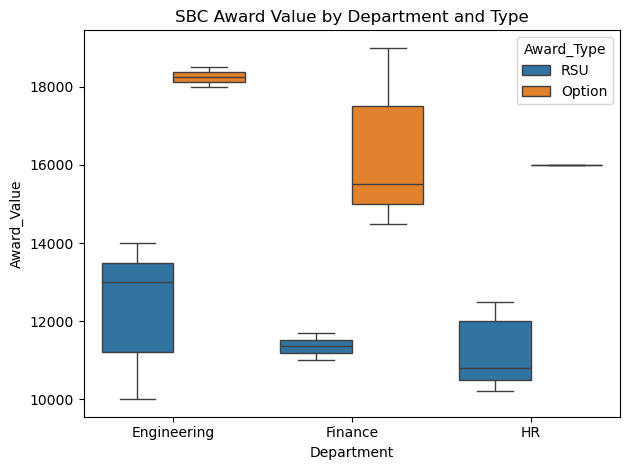

In [3]:
sns.boxplot(data=df, x="Department", y="Award_Value", hue="Award_Type")
plt.title("SBC Award Value by Department and Type")
plt.tight_layout()
plt.show()


In [4]:
import statsmodels.api as sm

X = sm.add_constant(df["Vesting_Years"])
y = df["Award_Value"]
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Award_Value   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     10.14
Date:                Tue, 22 Apr 2025   Prob (F-statistic):            0.00513
Time:                        23:32:18   Log-Likelihood:                -182.98
No. Observations:                  20   AIC:                             370.0
Df Residuals:                      18   BIC:                             372.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8410.2190   1751.247      4.802

In [5]:
# Encode Award_Type as numeric (dummy variable)
df["Award_Type_Encoded"] = df["Award_Type"].map({"RSU": 0, "Option": 1})

X2 = sm.add_constant(df[["Vesting_Years", "Award_Type_Encoded"]])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:            Award_Value   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     33.59
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.24e-06
Time:                        23:34:00   Log-Likelihood:                -171.45
No. Observations:                  20   AIC:                             348.9
Df Residuals:                      17   BIC:                             351.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9884.1270   1041

In [6]:
df_quarterly = df.groupby("Quarter")["Award_Value"].mean().reset_index()
df_quarterly["Quarter_Num"] = range(len(df_quarterly))  # convert quarter to time index

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Create the time series
ts = df_quarterly["Award_Value"]

# Fit ARIMA model (ARMA is ARIMA with d=0)
model = ARIMA(ts, order=(1, 0, 1))  # ARMA(1,1)
results = model.fit()

# Forecast next 2 quarters
forecast = results.get_forecast(steps=2)
print(forecast.summary_frame())


Award_Value          mean     mean_se  mean_ci_lower  mean_ci_upper
4            13852.146550  534.124680   12805.281414   14899.011685
5            13927.080728  782.876268   12392.671438   15461.490017


c:\Users\shree\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


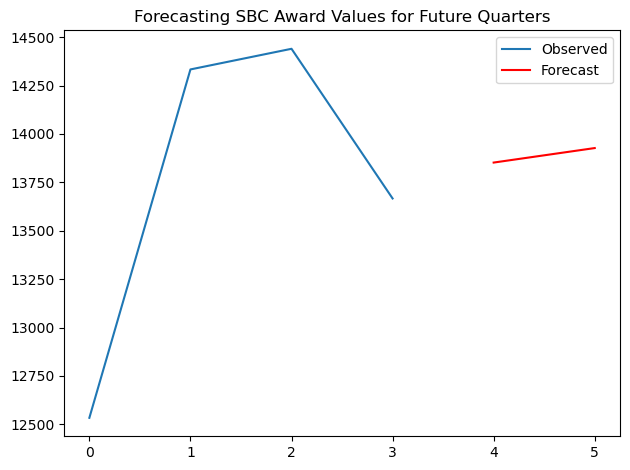

In [8]:
pred_df = forecast.summary_frame()
plt.plot(ts, label='Observed')
plt.plot(range(len(ts), len(ts)+2), pred_df["mean"], label='Forecast', color='red')
plt.title("Forecasting SBC Award Values for Future Quarters")
plt.legend()
plt.tight_layout()
plt.show()
